<a href="https://colab.research.google.com/github/samyff12/Modelos-estadisticos/blob/main/Ej%20logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!git clone https://github.com/BigDataDO/Recursos.git

fatal: destination path 'Recursos' already exists and is not an empty directory.


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [77]:
# Importing the dataset
dataset = pd.read_csv('/content/Recursos/Data Immersion Day/Jueves 30-04-2020/Social_Network_Ads.csv')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,NaN,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              397 non-null    float64
 3   EstimatedSalary  396 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


None

''

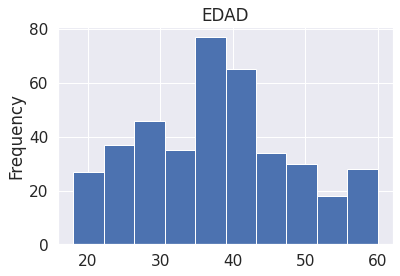

In [78]:
#Data Mining
display(dataset.head())
display(dataset.info())
#Histogramas
dataset['Age'].plot.hist(title="EDAD",bins=10)
;

In [79]:
dataset[dataset['EstimatedSalary'].isna() | dataset['Age'].isna()]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,NaN,19000.0,0
4,15804002,Male,19.0,NaN,0
19,15621083,Female,NaN,29000.0,1
27,15633531,Female,NaN,30000.0,1
51,15764195,Female,18.0,NaN,0
67,15654574,Female,23.0,NaN,0
76,15746737,Male,18.0,NaN,0


In [84]:
# Separar variables dependiente e independientes
X = dataset.drop(['Purchased','User ID'],axis=1)
y = dataset['Purchased']

In [85]:
# Arreglando la data vacia
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#imp.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imp.fit_transform(X.iloc[:, 1:3])

#Convertir variable sexo en variables dicotomicas(dummys)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X['Gender'] = labelencoder_X.fit_transform(X['Gender'])

# Dividiendo datos en Training set y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

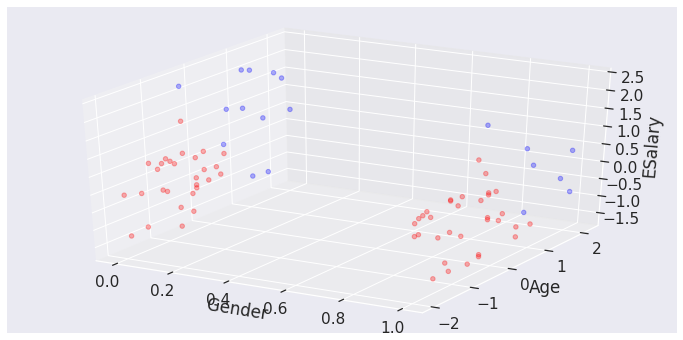

In [89]:
# Feature Scaling (Normalizacion)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,1:3] = sc.fit_transform(X_train.iloc[:,1:3])
X_test.iloc[:,1:3] = sc.transform(X_test.iloc[:,1:3])

# Fitting/Ajuste de Regresion Logistica a Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicciones de Test set 
y_pred = classifier.predict(X_test)

# Matriz de Confusion 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizando los resultados 
#from mpl_toolkits.mplot3d import Axes3D
X_test = np.asarray(X_test, dtype=np.float)
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection = '3d')
 
ax.scatter(X_test[:, 0], X_test[:, 1],X_test[:, 2],  c=y_pred, alpha=0.3, cmap=ListedColormap(['red','blue']))

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('ESalary')
plt.show()

In [69]:
cm

array([[56,  2],
       [ 5, 17]])

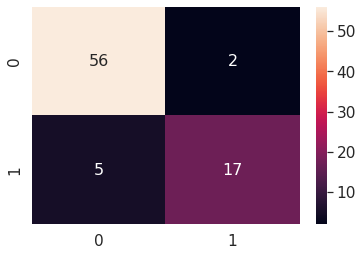

In [73]:
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
